# **QSAR Model Building of polymerase_basic_protein2_(PB2) Inhibitors**


# Read in data

In [7]:
import pandas as pd

In [8]:
dataset_url = 'https://raw.githubusercontent.com/Rayson-cloud/bioinformatics/main/polymerase_basic_protein2_(PB2)_06_bioactivity_data_3class_pEC50_pubchem_fp.csv'
dataset = pd.read_csv(dataset_url)

In [10]:
X = dataset.drop('pEC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
5,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
7,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
8,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
9,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [11]:
Y = dataset.iloc[:,-1]
Y

0      6.721246
1      7.619789
2      7.698970
3      7.853872
4      7.958607
5      7.958607
6      8.000000
7      7.886057
8      7.920819
9      8.275724
10     8.346787
11     8.017729
12     8.259637
13     8.522879
14     9.301030
15     8.853872
16     9.698970
17     9.397940
18     8.585027
19     8.552842
20     8.397940
21     8.000000
22     6.958607
23     5.698970
24     9.301030
25    10.221849
26     9.698970
27     7.920819
28     7.154902
29     9.221849
30     6.638272
31     6.657577
32     6.346787
Name: pEC50, dtype: float64

# Remove low variance features

In [12]:
from sklearn.feature_selection import VarianceThreshold

def remove_low_variance(input_data, threshold=0.1):
    selection = VarianceThreshold(threshold)
    selection.fit(input_data)
    return input_data[input_data.columns[selection.get_support(indices=True)]]

X = remove_low_variance(X, threshold=0.1)
X

,PubchemFP24,PubchemFP33,PubchemFP150,PubchemFP152,PubchemFP153,PubchemFP193,PubchemFP194,PubchemFP195,PubchemFP206,PubchemFP261,...,PubchemFP539,PubchemFP546,PubchemFP547,PubchemFP569,PubchemFP586,PubchemFP611,PubchemFP629,PubchemFP643,PubchemFP658,PubchemFP758
0,0,0,0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,1,...,1,1,1,1,0,1,0,0,0,0
2,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,0,1,0,1,0,0
3,1,0,0,0,0,1,0,0,1,1,...,1,1,0,0,0,0,0,1,0,1
4,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,0,1,0,1,0,0
5,0,0,0,0,0,1,0,0,1,1,...,1,1,0,0,0,0,0,1,0,1
6,1,0,0,0,0,0,1,1,1,1,...,1,1,1,1,0,1,0,1,0,0
7,0,0,0,0,0,0,1,1,1,1,...,1,1,1,1,0,1,0,1,0,0
8,0,0,0,0,0,1,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
9,0,0,1,0,1,0,0,0,0,1,...,1,1,0,0,0,0,0,1,0,0


In [22]:
X.to_csv('/Users/raysonfernandes/Desktop/bioactivity-prediction-app-main/descriptor_list.csv', index = False)

In [72]:
# In the app, use the following to get this same descriptor list
# of 218 variables from the initial set of 881 variables
# Xlist = list(pd.read_csv('descriptor_list.csv').columns)
# X[Xlist]

# Random Forest Regression Model

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
model = RandomForestRegressor(n_estimators=500, random_state=42)
model.fit(X, Y)
r2 = model.score(X, Y)
r2

0.6882577024505734

## Model Prediction

In [16]:
Y_pred = model.predict(X)
Y_pred

array([7.18780013, 7.62994419, 7.81444757, 7.5455177 , 7.88427192,
       7.18783156, 7.98648461, 7.81444757, 7.81028302, 8.1705697 ,
       8.30727176, 7.89252851, 8.100889  , 8.56909584, 9.28903465,
       8.68166499, 9.36741999, 8.17445224, 7.29632612, 8.50846513,
       8.69957852, 8.31821628, 8.17445224, 7.29632612, 9.4573141 ,
       9.86529828, 9.16987272, 7.77732093, 7.43165846, 8.6316069 ,
       7.32533333, 7.1203388 , 7.18783156])

## Model Performance

In [17]:
print('Mean squared error (MSE): %.2f'
      % mean_squared_error(Y, Y_pred))
print('Coefficient of determination (R^2): %.2f'
      % r2_score(Y, Y_pred))

Mean squared error (MSE): 0.33
Coefficient of determination (R^2): 0.69


# Data Visualization (Experimental vs Predicted pEC50 for Training Data)

In [18]:
import matplotlib.pyplot as plt
import numpy as np

Text(0.5, 0, 'Experimental pEC50')

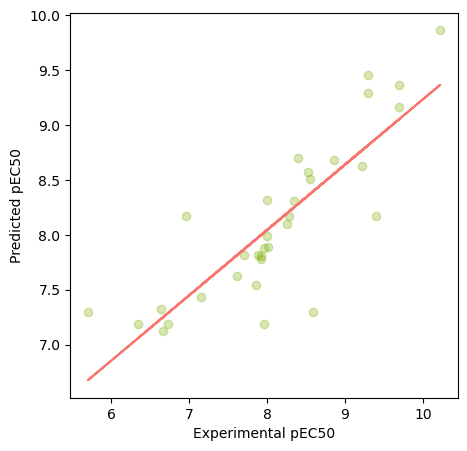

In [19]:
plt.figure(figsize=(5,5))
plt.scatter(x=Y, y=Y_pred, c="#7CAE00", alpha=0.3)

# Add trendline
# https://stackoverflow.com/questions/26447191/how-to-add-trendline-in-python-matplotlib-dot-scatter-graphs
z = np.polyfit(Y, Y_pred, 1)
p = np.poly1d(z)

plt.plot(Y,p(Y),"#F8766D")
plt.ylabel('Predicted pEC50')
plt.xlabel('Experimental pEC50')

# Save Model as Pickle Object

In [20]:
import pickle

In [21]:
pickle.dump(model, open('polymerase_basic_protein2_(PB2)_model.pkl', 'wb'))